<a href="https://colab.research.google.com/github/PREMJADHAV1597/Adv-python/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
a=pd.read_csv('Restaurant_Reviews.tsv',sep='\t')

In [ ]:
a.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


from matplotlib import pyplot as plt
_df_0['Liked'].plot(kind='hist', bins=20, title='Liked')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Review').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Liked'].plot(kind='line', figsize=(8, 4), title='Liked')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['Review'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Liked', y='Review', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
a['Review']=a['Review'].str.lower()

In [ ]:
a.head()

,Review,Liked
0,wow... loved this place.,1
1,crust is not good.,0
2,not tasty and the texture was just nasty.,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1


In [ ]:
import string
string.punctuation
exclude=string.punctuation

In [ ]:
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punc(x):
  for i in exclude:
    x=x.replace(i," ")
  return x


In [ ]:
remove_punc("hello! how are you?")

'hello  how are you '

In [ ]:
a['Review']=a['Review'].apply(remove_punc)

In [ ]:
a.head()

,Review,Liked
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
X=tf.fit_transform(a['Review']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y=a['Liked']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(800, 2035)

In [ ]:
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout
from keras.callbacks import EarlyStopping

In [ ]:
model=Sequential()

In [ ]:
model.add(Input(shape=(X_train.shape[1],)))

In [ ]:
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
es=EarlyStopping(monitor='val_accuracy',patience=15)


In [ ]:
hist=model.fit(X_train,y_train,epochs=100,validation_split=0.2,callbacks=[es])

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.5355 - loss: 0.6915 - val_accuracy: 0.4563 - val_loss: 0.6924
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5983 - loss: 0.6820 - val_accuracy: 0.5312 - val_loss: 0.6876
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6883 - loss: 0.6636 - val_accuracy: 0.6500 - val_loss: 0.6672
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8460 - loss: 0.6018 - val_accuracy: 0.7500 - val_loss: 0.6108
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9089 - loss: 0.4782 - val_accuracy: 0.8000 - val_loss: 0.5245
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9451 - loss: 0.3159 - val_accuracy: 0.8062 - val_loss: 0.4501
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9647 - loss: 0.1906 - val_accuracy: 0.8062 - val_loss: 0.4060
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9830 - loss: 0.1036 - val_accuracy: 0.8062 - 

In [ ]:
model.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.7552 - loss: 0.8402


[0.7494862079620361, 0.7699999809265137]

In [ ]:
yprob=model.predict(X_train)
yprob2=model.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [ ]:
ypred_tr=[]
for i in yprob:
  if i<0.5:
    ypred_tr.append(1)
  else:
    ypred_tr.append(0)

In [ ]:
ypred_tr[:5]

[1, 0, 1, 1, 0]

In [ ]:
ypred_ts=[]
for i in yprob2:
  if i<0.5:
    ypred_ts.append(1)
  else:
    ypred_ts.append(0)

In [ ]:
ypred_ts[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

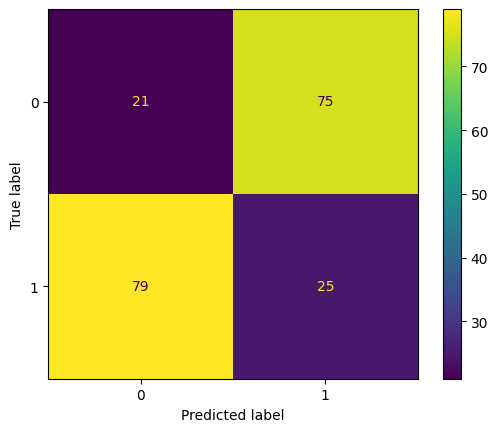

In [ ]:
cf=confusion_matrix(y_test,ypred_ts)
cfd=ConfusionMatrixDisplay(cf)
cfd.plot()


In [ ]:
st=input('Enter Your Review ')
stl=st.lower()
strm=remove_punc(stl)
sttf=tf.transform([strm]).toarray()
pred=model.predict(sttf)
if pred<0.5:
  print('Negative Review')
else:
  print('Positive Review')